In [1]:
import pandas as pd
import librosa
import h5py
import numpy as np

In [59]:
df  = pd.DataFrame(pd.read_csv('database.csv', encoding='cp1252'))
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

In [60]:
df.isnull().any()

Area Code       False
Area            False
Months Code     False
Months          False
Element Code    False
                ...  
Y2015            True
Y2016            True
Y2017            True
Y2018            True
Y2019            True
Length: 66, dtype: bool

In [61]:
(df.isnull().sum()/len(df.index))*100

Area Code        0.000000
Area             0.000000
Months Code      0.000000
Months           0.000000
Element Code     0.000000
                  ...    
Y2015           13.411350
Y2016           13.545982
Y2017           13.359569
Y2018           13.535626
Y2019           13.369925
Length: 66, dtype: float64

In [62]:
df = df.dropna()

<AxesSubplot: >

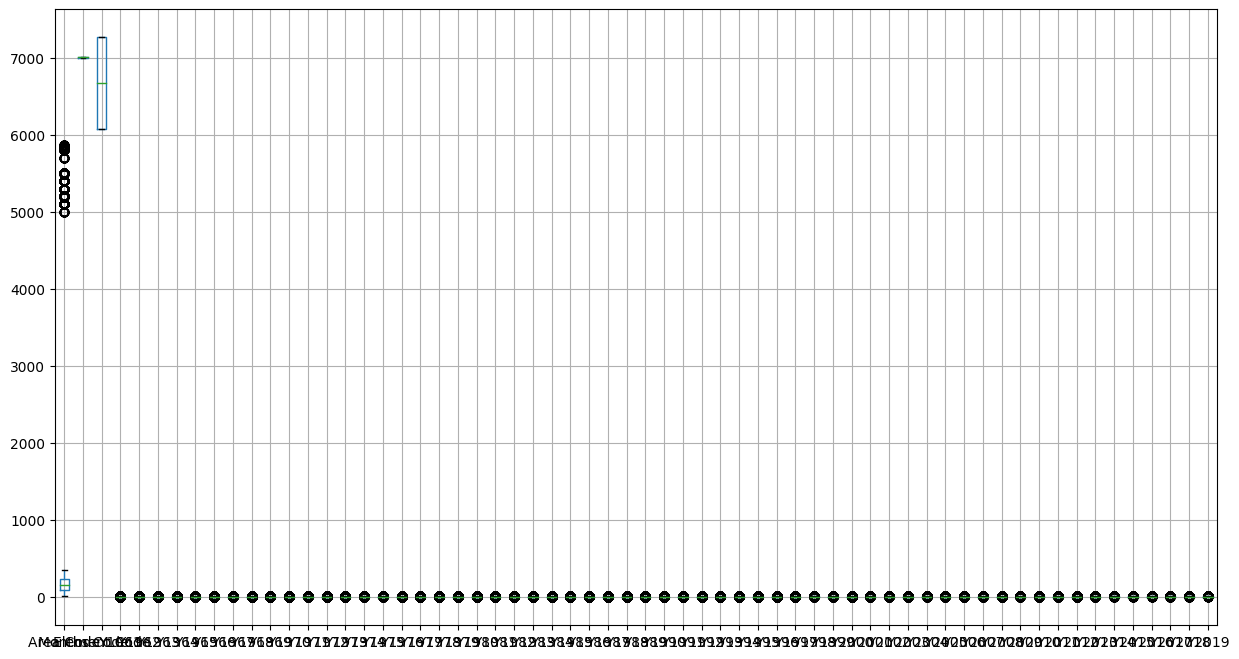

In [29]:
df.boxplot(figsize=(15,8))

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6760 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     6760 non-null   int64  
 1   Area          6760 non-null   object 
 2   Months Code   6760 non-null   int64  
 3   Months        6760 non-null   object 
 4   Element Code  6760 non-null   int64  
 5   Element       6760 non-null   object 
 6   Unit          6760 non-null   object 
 7   Y1961         6760 non-null   float64
 8   Y1962         6760 non-null   float64
 9   Y1963         6760 non-null   float64
 10  Y1964         6760 non-null   float64
 11  Y1965         6760 non-null   float64
 12  Y1966         6760 non-null   float64
 13  Y1967         6760 non-null   float64
 14  Y1968         6760 non-null   float64
 15  Y1969         6760 non-null   float64
 16  Y1970         6760 non-null   float64
 17  Y1971         6760 non-null   float64
 18  Y1972         6760 non-null 

In [64]:
i = df[((df.Element == 'Standard Deviation'))].index

In [78]:
l = ['Sep–Oct–Nov', 'Mar–Apr–May', 'Dec–Jan–Feb', 'Jun–Jul–Aug']

In [79]:
for months in l:
    i = df[((df.Months == months))].index 
    df = df.drop(i)

In [80]:
df[df['Area'] == 'Italy']

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
3740,106,Italy,7001,January,7271,Temperature change,°C,-0.258,1.410,-2.506,...,-0.091,0.934,0.650,1.157,2.964,1.570,2.017,-1.175,3.068,-0.500
3742,106,Italy,7002,February,7271,Temperature change,°C,1.402,-0.946,-2.557,...,0.450,0.712,-2.454,-1.025,2.768,0.166,3.010,2.483,-0.845,1.525
3744,106,Italy,7003,March,7271,Temperature change,°C,1.426,-1.818,-0.920,...,0.516,0.898,2.539,0.576,1.796,1.208,1.166,2.776,0.651,2.113
3746,106,Italy,7004,April,7271,Temperature change,°C,2.742,0.312,0.643,...,1.485,2.496,1.258,2.040,1.847,1.368,2.808,1.552,3.717,1.284
3748,106,Italy,7005,May,7271,Temperature change,°C,-0.013,-0.345,-0.327,...,0.527,1.649,0.934,0.416,0.326,2.164,0.600,1.992,2.315,-1.253
3750,106,Italy,7006,June,7271,Temperature change,°C,0.502,-0.649,-0.075,...,1.033,1.501,2.889,0.541,1.638,2.128,1.379,3.537,2.008,3.732
3752,106,Italy,7007,July,7271,Temperature change,°C,-0.414,0.031,0.997,...,2.426,0.625,2.595,1.835,0.118,3.980,2.136,2.300,2.467,2.538
3754,106,Italy,7008,August,7271,Temperature change,°C,0.150,1.725,0.094,...,1.089,2.096,3.180,2.070,0.688,2.394,1.284,3.262,2.394,2.964
3756,106,Italy,7009,September,7271,Temperature change,°C,2.032,0.769,0.325,...,-0.075,2.686,1.247,1.070,0.968,1.283,1.594,-0.148,2.129,1.927
3758,106,Italy,7010,October,7271,Temperature change,°C,1.008,0.736,-0.287,...,-0.034,0.599,1.920,2.518,2.411,1.056,1.207,1.458,2.297,2.752


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 9654
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     2579 non-null   int64  
 1   Area          2579 non-null   object 
 2   Months Code   2579 non-null   int64  
 3   Months        2579 non-null   object 
 4   Element Code  2579 non-null   int64  
 5   Element       2579 non-null   object 
 6   Unit          2579 non-null   object 
 7   Y1961         2579 non-null   float64
 8   Y1962         2579 non-null   float64
 9   Y1963         2579 non-null   float64
 10  Y1964         2579 non-null   float64
 11  Y1965         2579 non-null   float64
 12  Y1966         2579 non-null   float64
 13  Y1967         2579 non-null   float64
 14  Y1968         2579 non-null   float64
 15  Y1969         2579 non-null   float64
 16  Y1970         2579 non-null   float64
 17  Y1971         2579 non-null   float64
 18  Y1972         2579 non-null 

In [82]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [111]:
predictors = df.columns[~df.columns.isin(["Area", "Months Code", "Y1961"])]

In [112]:
df.columns[~df.columns.isin(["Area", "Months Code", "Y1961"])]

Index(['Area Code', 'Months', 'Element Code', 'Element', 'Unit', 'Y1962',
       'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970',
       'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978',
       'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986',
       'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994',
       'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002',
       'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010',
       'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018',
       'Y2019'],
      dtype='object')

In [113]:
df.shape[0]

2579

In [124]:
def backtest(weather, model, predictors, start=63, step=1):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        print(i)
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        print(train["Y1961"].shape)
        model.fit(train[predictors], train["Y1961"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["Y1961"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
        print(all_predictions)
    #return pd.concat(all_predictions)

In [125]:

predictions = backtest(df, rr, predictors)

63
(63,)


ValueError: could not convert string to float: 'January'